In [1]:
import autograd.numpy as ag_np
import matplotlib.pyplot as plt
from AbstractBaseCollabFilterSGD import AbstractBaseCollabFilterSGD
from train_valid_test_loader import load_train_valid_test_datasets

from CollabFilterOneScalarPerItem import CollabFilterOneScalarPerItem

In [2]:
# Load the dataset
train_tuple, valid_tuple, test_tuple, n_users, n_items = \
    load_train_valid_test_datasets()

In [3]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model1 = CollabFilterOneScalarPerItem(
    n_epochs=200, batch_size=10000, step_size=0.9)
model1.init_parameter_dict(n_users, n_items, train_tuple)

In [4]:
# Fit the model with SGD
model1.fit(train_tuple, valid_tuple)

(0.7, 1.0)

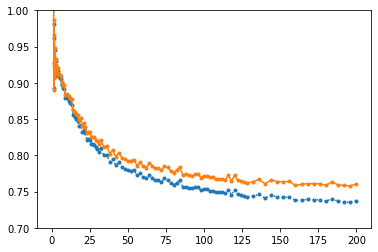

In [12]:
plt.plot(model1.trace_epoch, model1.trace_mae_train, '.:')
plt.plot(model1.trace_epoch, model1.trace_mae_valid, '.-')
plt.ylim(0.7, 1.0)

In [6]:
# Create the model and initialize its parameters
# to have right scale as the dataset (right num users and items)
model2 = CollabFilterOneScalarPerItem(
    n_epochs=200, batch_size=100, step_size=0.9)
model2.init_parameter_dict(n_users, n_items, train_tuple)

In [7]:
# Fit the model with SGD
model2.fit(train_tuple, valid_tuple)

(0.7, 1.0)

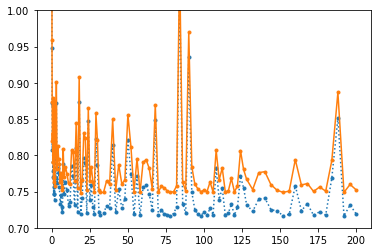

In [14]:
plt.plot(model2.trace_epoch, model2.trace_mae_train, '.:')
plt.plot(model2.trace_epoch, model2.trace_mae_valid, '.-')
plt.ylim(0.7, 1.0)

In [9]:
print(model2.param_dict['c_per_item'][0:10])

[ 0.59186828  0.0086711  -0.23376764  0.32454632  0.04161221  0.47007752
  0.52166398  0.78023637  0.65467665  0.61896442]


In [10]:
import pandas as pd
select_movies_df = pd.read_csv("./data_movie_lens_100k/select_movies.csv")
select_movies_id = select_movies_df["item_id"]
select_movies_title = select_movies_df["title"]
c_per_select = ag_np.round(model2.param_dict['c_per_item'][select_movies_id], 4)
select_movies_title = select_movies_title[ag_np.argsort(c_per_select)]
c_per_select = c_per_select[ag_np.argsort(c_per_select)]
print(" Bias     Title")
for i, movie in enumerate(select_movies_title):
    if(c_per_select[i] > 0): print(" ", end='')
    print(c_per_select[i], " ", movie)

 Bias     Title
-0.3535   Lost World: Jurassic Park, The (1997)
-0.3178   Scream 2 (1997)
-0.067   My Best Friend's Wedding (1997)
-0.0538   Nightmare on Elm Street, A (1984)
 0.1605   Scream (1996)
 0.1913   Sleepless in Seattle (1993)
 0.3225   Snow White and the Seven Dwarfs (1937)
 0.3552   While You Were Sleeping (1995)
 0.3676   Nightmare Before Christmas, The (1993)
 0.45   Jurassic Park (1993)
 0.4572   Lion King, The (1994)
 0.4825   Shining, The (1980)
 0.5073   Sound of Music, The (1965)
 0.5919   Toy Story (1995)
 0.6598   Return of the Jedi (1983)
 0.673   Indiana Jones and the Last Crusade (1989)
 0.8933   Wizard of Oz, The (1939)
 0.9417   Empire Strikes Back, The (1980)
 1.1248   Raiders of the Lost Ark (1981)
 1.1927   Star Wars (1977)


(0.7, 0.95)

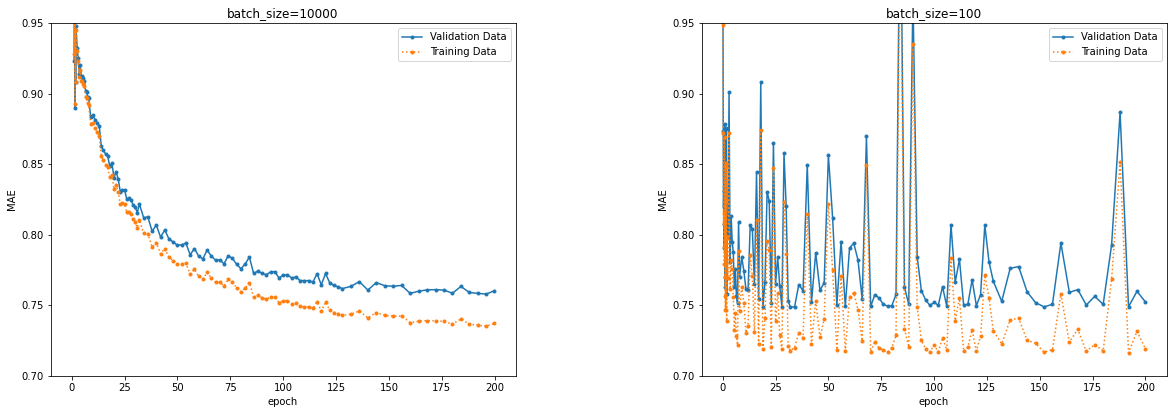

In [11]:
n_rows = 1
n_cols = 2
f, axs = plt.subplots(1,2,figsize=(10*n_cols,5*n_rows))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.4, wspace=0.4)

plt.subplot(n_rows,n_cols,1)
plt.plot(model1.trace_epoch, model1.trace_mae_valid, '.-')
plt.plot(model1.trace_epoch, model1.trace_mae_train, '.:')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend(["Validation Data", "Training Data"])
plt.title("batch_size=10000")
plt.ylim(0.7,0.95)
  
plt.subplot(n_rows,n_cols,2)
plt.plot(model2.trace_epoch, model2.trace_mae_valid, '.-')
plt.plot(model2.trace_epoch, model2.trace_mae_train, '.:')
plt.xlabel("epoch")
plt.ylabel("MAE")
plt.legend(["Validation Data", "Training Data"])
plt.title("batch_size=100")
plt.ylim(0.7,0.95)

In [15]:
print(min(model1.trace_mae_valid))
print(ag_np.argmin(model1.trace_mae_valid))

0.7578885381524854
115


In [17]:
model3 = CollabFilterOneScalarPerItem(
    n_epochs=115, batch_size=10000, step_size=0.9)
model3.init_parameter_dict(n_users, n_items, train_tuple)
# Fit the model with SGD
model3.fit(train_tuple, valid_tuple)

In [19]:
yhat_te_L = model3.predict(test_tuple[0], test_tuple[1], model3.param_dict['mu'], model3.param_dict['b_per_user'], model3.param_dict['c_per_item'])
MAE = ag_np.mean(ag_np.absolute(yhat_te_L - test_tuple[2]))
print(MAE)

0.7630767853601523
